# Neural network for image classification - cats and dogs

## Approach 1 - extract all the pixels

### Importing the libraries

In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Extracting pixels from images

In [2]:
zip_object = zipfile.ZipFile(file='cat_dog_1.zip', mode='r')
zip_object.extractall('./')
zip_object.close()

In [3]:
directory = 'cat_dog_1'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
files = files[1:3]

In [4]:
files

['cat_dog_1/test', 'cat_dog_1/train']

#### Train

In [5]:
height, width = 128, 128
train_images = []
train_classes = []

In [6]:
train_directory = files[1]
train_files = [os.path.join(train_directory, f) for f in sorted(os.listdir(train_directory))]

In [7]:
for image_path in train_files:
  try:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]
  except:
    continue
  
  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  image = image.ravel()
  train_images.append(image)

  image_name = os.path.basename(os.path.normpath(image_path))

  if image_name.startswith('cat'):
    class_name = 0
  else :
    class_name = 1
  
  train_classes.append(class_name)

In [8]:
train_images = np.asarray(train_images)
train_classes = np.asarray(train_classes)

#### Test

In [9]:
test_images = []
test_classes = []

In [10]:
test_directory = files[0]
test_files = [os.path.join(test_directory, f) for f in sorted(os.listdir(test_directory))]

In [11]:
for image_path in test_files:
  try:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]
  except:
    continue
  
  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  image = image.ravel()
  test_images.append(image)

  image_name = os.path.basename(os.path.normpath(image_path))

  if image_name.startswith('cat'):
    class_name = 0
  else :
    class_name = 1
  
  test_classes.append(class_name)

In [12]:
test_images = np.asarray(test_images)
test_classes = np.asarray(test_classes)

### Normalizing the data

In [13]:
scaler = MinMaxScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

### Building and training the neural network

In [14]:
input_size = (train_images.shape[1],)
unit_size = (train_images.shape[1] + 2) / 2
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_shape=input_size, units=unit_size, activation='relu'))
model.add(tf.keras.layers.Dense(units=unit_size, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [15]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_classes, epochs=20)

Epoch 1/20
125/125 [==============================] - 442s 4s/step - loss: 6.5632 - accuracy: 0.5315
Epoch 2/20
125/125 [==============================] - 440s 4s/step - loss: 0.6844 - accuracy: 0.5605
Epoch 3/20
125/125 [==============================] - 432s 3s/step - loss: 0.6771 - accuracy: 0.5658
Epoch 4/20
125/125 [==============================] - 449s 4s/step - loss: 0.6849 - accuracy: 0.5683
Epoch 5/20
125/125 [==============================] - 448s 4s/step - loss: 0.6773 - accuracy: 0.5652
Epoch 6/20
125/125 [==============================] - 450s 4s/step - loss: 0.6900 - accuracy: 0.5280
Epoch 7/20
125/125 [==============================] - 441s 4s/step - loss: 0.6830 - accuracy: 0.5235
Epoch 8/20
125/125 [==============================] - 453s 4s/step - loss: 0.6790 - accuracy: 0.5480
Epoch 9/20
125/125 [==============================] - 442s 4s/step - loss: 0.6755 - accuracy: 0.5410
Epoch 10/20
125/125 [==============================] - 443s 4s/step - loss: 0.6744 - accura

### Evaluating the neural network

In [18]:
predictions = model.predict(test_images)
predictions = (predictions > 0.5)

32/32 [==============================] - 14s 428ms/step


In [19]:
accuracy_score(test_classes, predictions)

0.589

In [20]:
cm = confusion_matrix(test_classes, predictions)
cm

array([[321, 179],
       [232, 268]])

<Axes: >

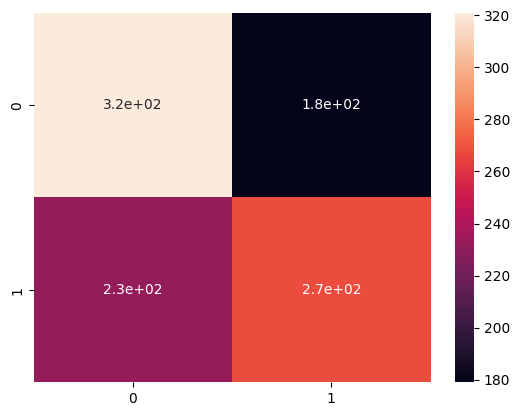

In [21]:
sns.heatmap(cm, annot=True)

In [22]:
print(classification_report(test_classes, predictions))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       500
           1       0.60      0.54      0.57       500

    accuracy                           0.59      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.59      0.59      0.59      1000

